<a href="https://colab.research.google.com/github/harshitasakhare/Python-/blob/main/JOB%20DATASET%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
try:
    df = pd.read_csv('/content/drive/MyDrive/dataset 1/DA -Task 2..csv', encoding='latin-1')
except UnicodeDecodeError:
    try:
        df = pd.read_csv('/content/drive/MyDrive/dataset 1/DA -Task 2..csv', encoding='cp1252')
    except UnicodeDecodeError:
        print("Could not decode the file with 'latin-1' or 'cp1252' encoding. Please check the file encoding.")

In [8]:
df.head()

,VIN,TRANSACTION_ID,CORRECTION_VERBATIM,CUSTOMER_VERBATIM,REPAIR_DATE,CAUSAL_PART_NM,GLOBAL_LABOR_CODE_DESCRIPTION,PLATFORM,BODY_STYLE,VPPC,...,TRANSMISSION_TRACE_NBR,SRC_TXN_ID,SRC_VER_NBR,TRANSACTION_CNTR,MEDIA_FLAG,VIN_MODL_DESGTR,LINE_SERIES,LAST_KNOWN_DELVRY_TYPE_CD,NON_CAUSAL_PART_QTY,SALES_REGION_CODE
0,3HCFDDE89SH220903,13021,REPLACED STEERING WHEEL NOW OKAY,STEERING WHEEL COMING APART,01-02-2024,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,...,S2210121CNJX0941,2808908219,6,1,N,CF10543,1500,21.0,0,1
1,1HRFFEE8XSZ230636,13028,CHECKED - FOUND DTC'S U0229 - U1530 SET IN BCM...,CUSTOMER STATES HEATED STEERING WHEEL INOP,01-03-2024,MODULE ASM-STRG WHL HT CONT,Heated Steering Wheel Module Replacement,Full-Size Trucks,Crew Cab,T1CGF,...,R2210881CNJX0287,2808841910,6,1,Y,TF10543,1500,10.0,0,1
2,1HYKSMRK6SZ000990,13035,APPROVED 4.9(OLH) FOR ADDED DIAGNOSTICS WITH T...,OWNER REPORTS: THE SUPER CRUISE BAR ON THE STE...,01-04-2024,WHEEL ASM-STRG *BACKEN BLACKK,Steering Wheel Replacement,BEV,4 Door Utility,L233-LSOP,...,NaN,2809979441,4,1,Y,6MB26,Lux-1,10.0,0,1
3,3HCFDFEL3SH241701,13021,STEERING WHEEL REPLACEMENT,CUSTOMER STATES THE LETTERING AND FINISH ON TH...,01-04-2024,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,...,S1210822CKJX0291,2808892288,6,1,Y,CF10543,1500,10.0,0,1
4,1HRFFHEL1RZ181474,13021,REPLACED STEERING MESSAGE NO LONGER DISPLAYED,C/S: CUSTOMER STATES THE SERVICE DRIVER ASSIST...,01-05-2024,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CGF,...,R2212982CKJX0282,2808901882,8,1,N,TF10543,1500,10.0,0,1


In [12]:
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print("Info:\n", df.info())
print("Missing values:\n", df.isnull().sum())
print("Sample rows:\n", df.head())

Shape: (100, 52)
Columns: ['VIN', 'TRANSACTION_ID', 'CORRECTION_VERBATIM', 'CUSTOMER_VERBATIM', 'REPAIR_DATE', 'CAUSAL_PART_NM', 'GLOBAL_LABOR_CODE_DESCRIPTION', 'PLATFORM', 'BODY_STYLE', 'VPPC', 'PLANT', 'BUILD_COUNTRY', 'LAST_KNOWN_DLR_NAME', 'LAST_KNOWN_DLR_CITY', 'REPAIRING_DEALER_CODE', 'DEALER_NAME', 'REPAIR_DLR_CITY', 'STATE', 'DEALER_REGION', 'REPAIR_DLR_POSTAL_CD', 'REPAIR_AGE', 'KM', 'COMPLAINT_CD_CSI', 'COMPLAINT_CD', 'VEH_TEST_GRP', 'COUNTRY_SALE_ISO', 'ORD_SELLING_SRC_CD', 'OPTN_FAMLY_CERTIFICATION', 'OPTF_FAMLY_EMISSIOF_SYSTEM', 'GLOBAL_LABOR_CODE', 'TRANSACTION_CATEGORY', 'CAMPAIGN_NBR', 'REPORTING_COST', 'TOTALCOST', 'LBRCOST', 'ENGINE', 'ENGINE_DESC', 'TRANSMISSION', 'TRANSMISSION_DESC', 'ENGINE_SOURCE_PLANT', 'ENGINE_TRACE_NBR', 'TRANSMISSION_SOURCE_PLANT', 'TRANSMISSION_TRACE_NBR', 'SRC_TXN_ID', 'SRC_VER_NBR', 'TRANSACTION_CNTR', 'MEDIA_FLAG', 'VIN_MODL_DESGTR', 'LINE_SERIES', 'LAST_KNOWN_DELVRY_TYPE_CD', 'NON_CAUSAL_PART_QTY', 'SALES_REGION_CODE']
<class 'pandas.cor

In [13]:
df.columns = df.columns.str.strip()
df = df.drop_duplicates()
df['REPAIR_DATE'] = pd.to_datetime(df['REPAIR_DATE'], errors='coerce')

# Drop rows with crucial missing info
df.dropna(subset=['VIN', 'REPAIR_DATE', 'DEALER_NAME'], inplace=True)

In [14]:
print("\nMost Common Causal Parts:")
print(df['CAUSAL_PART_NM'].value_counts().head(10))

print("\nMost Active Platforms:")
print(df['PLATFORM'].value_counts().head(10))

print("\nMost Common Repair States:")
print(df['STATE'].value_counts().head(10))

print("\nTop 5 Dealers by Repairs:")
print(df['DEALER_NAME'].value_counts().head(5))


Most Common Causal Parts:
CAUSAL_PART_NM
WHEEL ASM-STRG *JET BLACK                        45
WHEEL ASM-STRG *BLACK                            12
WHEEL ASM-STRG *VERY DARK AT                      7
MODULE ASM-STRG WHL HT CONT                       5
WHEEL ASM-STRG *BACKEN BLACKK                     5
HARNESS ASM-STRG WHL HORN SW WRG                  4
COVER-STRG WHL SPOKE *HI GLOSS V-C                3
WHEEL ASM-STRG * JET BLACK                        2
APPLIQUE ASM-STRG WHL TR SPOKE CVR *VULCAN        2
APPLIQUE ASM-STRG WHL TR SPOKE CVR *SYNTHESIS     2
Name: count, dtype: int64

Most Active Platforms:
PLATFORM
Full-Size Trucks             52
Full-Size Utility            13
Crossover SUV                11
Global Gamma                  7
Global Crossover Vehicles     7
BEV                           5
Luxury Car-3                  1
Global Gamma Vehicles         1
GLOBAL EPSILON II             1
Alpha                         1
Name: count, dtype: int64

Most Common Repair States:
STATE

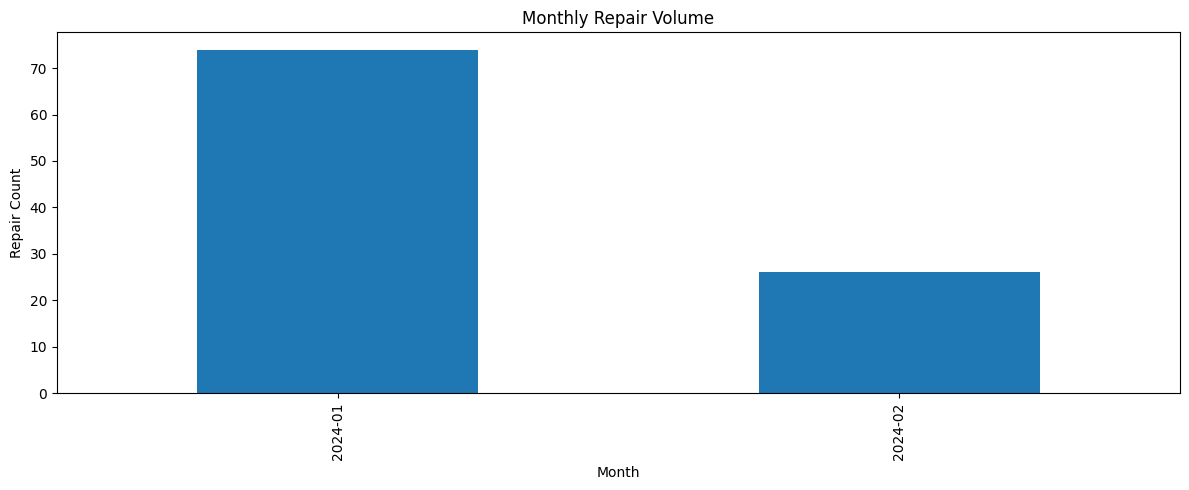

In [15]:
monthly_repairs = df['REPAIR_DATE'].dt.to_period('M').value_counts().sort_index()
monthly_repairs.plot(kind='bar', figsize=(12, 5), title='Monthly Repair Volume')
plt.xlabel("Month")
plt.ylabel("Repair Count")
plt.tight_layout()
plt.show()

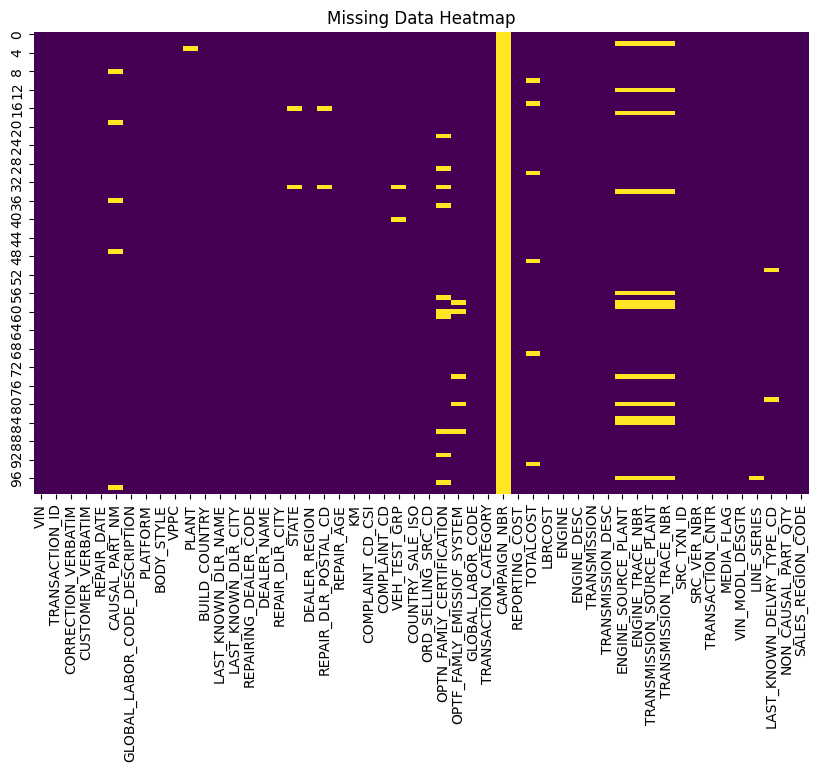

In [16]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

In [17]:
grouped = df.groupby(['STATE', 'PLATFORM']).size().reset_index(name='Repair Count')
print("\nGrouped Repairs by State and Platform:\n", grouped.sort_values(by='Repair Count', ascending=False).head(10))



Grouped Repairs by State and Platform:
    STATE          PLATFORM  Repair Count
16    FL  Full-Size Trucks             5
47    OH  Full-Size Trucks             4
63    TX  Full-Size Trucks             4
6     CA               BEV             3
5     BC  Full-Size Trucks             3
8     CA  Full-Size Trucks             3
35    MN  Full-Size Trucks             3
62    TX     Crossover SUV             3
51    ON  Full-Size Trucks             2
50    ON     Crossover SUV             2


In [18]:
df.to_csv("cleaned_DA_Task2.csv", index=False)
print("\nCleaned data saved to 'cleaned_DA_Task2.csv'")


Cleaned data saved to 'cleaned_DA_Task2.csv'
